In [30]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

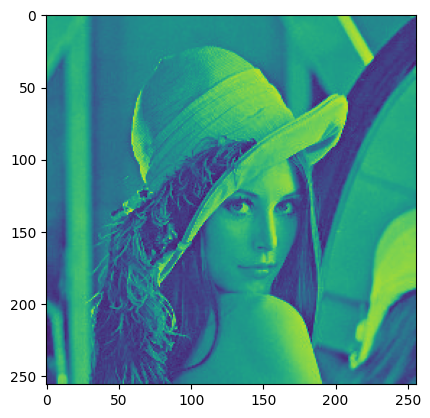

In [31]:
img = np.load('sample.npy')
plt.imshow(img)

In [32]:
img = np.floor(img/2)
img

array([[82., 80., 78., ..., 84., 82., 64.],
       [81., 80., 79., ..., 89., 85., 62.],
       [80., 79., 79., ..., 71., 59., 32.],
       ...,
       [24., 24., 25., ..., 44., 45., 45.],
       [22., 24., 25., ..., 49., 49., 47.],
       [21., 24., 26., ..., 51., 54., 55.]])

In [33]:
fltr = np.load('filter.npy')
fltr

array([[ 3,  1, -3],
       [ 1,  5, -1],
       [ 3,  1, -3]], dtype=int32)

In [34]:
def Myconv2d(a,b):
    """a is the image, b is the filter"""
    a = np.array(a)
    b = np.array(b)

    a_shape = np.shape(a)
    b_shape = np.shape(b)

    res_shape1 = np.abs(a_shape[0] - b_shape[0]) + 1
    res_shape2 = np.abs(a_shape[1] - b_shape[1]) + 1

    res = np.zeros([res_shape1 , res_shape2])

    for i in range(res_shape1):
        for j in range(res_shape2):
            res[i, j] = np.sum(
                np.multiply(
                    np.flip(b), a[i : i + b_shape[0], j : j + b_shape[1]]
                )
            )

    return res

In [35]:
Result_Imp = Myconv2d(img, fltr)
Result_Python = signal.convolve2d(img, fltr, mode='valid')
checkup = np.sum(np.abs(Result_Imp - Result_Python))
print("The Error Value is:", checkup)

The Error Value is: 0.0


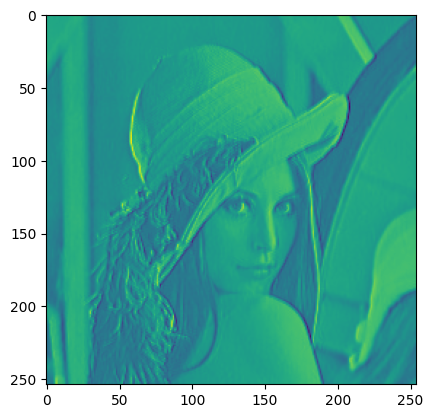

In [36]:
plt.imshow(Result_Imp)